# Mental Health in Tech Industry

In [2]:
### Load relevant packages
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


## Introduction

**Business Context.** 
There are two questions that we might be able to aswer:
 A. How is the productivity affected by the work environment for people with mental health problems ?
 B. How likely is for a person to develop a mental health within specific work environment ?

**Business Problem.** 

##### Question A
To answer question A, we would need to look at:
"Do you believe your productivity is ever affected by a mental health issue?"  based on work conditions.
However, this question is not answered by any of the employees from US. 
Instead, we could look at :
 - If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*
 - If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*

I believe we can relate this to how well people with/without treatment are doing at work. 

Now, we could rephrase the question A as following: **How likely is that an employee with a mental disease would look for treatment ?**

Feature Examples:
- company support
- environment at work (superviser, co-workers)
- insurance coverage
- medical leave

##### Question B
Select people with MD, which had no family history of MD:
with previous MD (check if worked in a tech company): 7
without previous MD : 3
We might be lacking in statistics here. We would need to check if we gain more from adding the 2018,2016 and 2014 datasets, or adding the rest of the countries (not very happy with this one).

**Analytical Context.** The dataset consists of OSMI 2019-2014 survey results.

**Case Studied.** The following cases need to be completed:

1. Select the features representative for the study and change the feature names for simplifying the data manipulation.
2. Map the categorical and boolean variables to numerical values.
3. Manipulate the missing (NaN) values
4. Build the data table necessary for question A
5. Build the data table necessary for question B

## Data exploration

Let's start by taking a look at the available data. The following questions represent the 2019 survey:

1. *Are you self-employed?*
2. How many employees does your company or organization have?
3. Is your employer primarily a tech company/organization?
4. Is your primary role within your company related to tech/IT?
5. Does your employer provide mental health benefits as part of healthcare coverage?
6. Do you know the options for mental health care available under your employer-provided health coverage?
7. Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
8. Does your employer offer resources to learn more about mental health disorders and options for seeking help?
9. Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
10. If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?
11. Would you feel more comfortable talking to your coworkers about your physical health or your mental health?
12. Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?
13. Have you ever discussed your mental health with your employer?
14. Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.
15. Would you feel comfortable discussing a mental health issue with your coworkers?
16. Have you ever discussed your mental health with coworkers?
17. Describe the conversation with coworkers you had about your mental health including their reactions.
18. Have you ever had a coworker discuss their or another coworker's mental health with you?
19. Describe the conversation your coworker had with you about their mental health (please do not use names).
20. Overall, how much importance does your employer place on physical health?
21. Overall, how much importance does your employer place on mental health?
22. Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?
23. Do you know local or online resources to seek help for a mental health issue?
24. If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?
25. If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?
26. If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?
27. If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?
28. Do you believe your productivity is ever affected by a mental health issue?
29. If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?
30. *Do you have previous employers?*
31. Was your employer primarily a tech company/organization?
32. Have your previous employers provided mental health benefits?
33. Were you aware of the options for mental health care provided by your previous employers?
34. Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
35. Did your previous employers provide resources to learn more about mental health disorders and how to seek help?
36. Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
37. Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?
38. Would you have been willing to discuss your mental health with your direct supervisor(s)?
39. Did you ever discuss your mental health with your previous employer?
40. Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.
41. Would you have been willing to discuss your mental health with your coworkers at previous employers?
42. Did you ever discuss your mental health with a previous coworker(s)?
43. Describe the conversation you had with your previous coworkers about your mental health including their reactions.
44. Did you ever have a previous coworker discuss their or another coworker's mental health with you?
45. Describe the conversation your coworker had with you about their mental health (please do not use names)..1
46. Overall, how much importance did your previous employer place on physical health?
47. Overall, how much importance did your previous employer place on mental health?
48. Do you *currently* have a mental health disorder?
49. Have you ever been *diagnosed* with a mental health disorder?
50. *What disorder(s) have you been diagnosed with?*
51. *If possibly, what disorder(s) do you believe you have?*
52. *If so, what disorder(s) were you diagnosed with?*
53. Have you had a mental health disorder in the past?
54. Have you ever sought treatment for a mental health disorder from a mental health professional?
55. Do you have a family history of mental illness?
56. If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*
57. If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*
58. Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?
59. How willing would you be to share with friends and family that you have a mental illness?
60. Would you be willing to bring up a physical health issue with a potential employer in an interview?
61. Why or why not?
62. Would you bring up your *mental* health with a potential employer in an interview?
63. Why or why not?.1
64. Are you openly identified at work as a person with a mental health issue?
65. Has being identified as a person with a mental health issue affected your career?
66. How has it affected your career?
67. If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?
68. Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?
69. Describe the circumstances of the badly handled or unsupportive response.
70. Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?
71. Describe the circumstances of the supportive or well handled response.
72. Overall, how well do you think the tech industry supports employees with mental health issues?
73. Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.
74. If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.
75. Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)
76. What is your age?
77. What is your gender?
78. What country do you *live* in?
79. What US state or territory do you *live* in?
80. What is your race?
81. What country do you *work* in?
82. What US state or territory do you *work* in?

In [5]:
dataTrain = pd.read_csv("OSMI 2019 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv")
columnsN = data_2019.head()
data_2019.head()

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",...,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?
0,False,26-100,True,True,I don't know,No,Yes,Yes,I don't know,Very easy,...,NaN,NaN,False,25,Male,United States of America,Nebraska,White,United States of America,Nebraska
1,False,26-100,True,True,Yes,No,No,Yes,Yes,I don't know,...,NaN,NaN,False,51,male,United States of America,Nebraska,White,United States of America,Nebraska
2,False,26-100,True,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,...,I think opening up more conversation around th...,Thank you,True,27,Male,United States of America,Illinois,White,United States of America,Illinois
3,False,100-500,True,True,I don't know,No,Yes,Yes,Yes,Very easy,...,NaN,NaN,False,37,male,United States of America,Nebraska,White,United States of America,Nebraska
4,False,26-100,True,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,...,NaN,NaN,False,46,m,United States of America,Nebraska,White,United States of America,Nebraska


In [6]:
data_2016 = pd.read_csv("2016-Clean - Non Self-Employed.csv")
data_2016.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,...,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,More than 1000,0,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,...,1,Not applicable to me,Not applicable to me,55,F,United States of America,United States of America,California,HR,Never
1,0,100-500,0,No,No,Yes,No,Yes,Somewhat difficult,Yes,...,1,Often,Often,74,F,United States of America,United States of America,California,Support|Back-end Developer,Sometimes
2,0,More than 1000,0,Yes,Yes,Yes,Yes,Yes,Neither easy nor difficult,No,...,1,Sometimes,Often,54,F,United States of America,United States of America,Texas,Other,Never
3,0,26-100,0,Yes,Yes,Yes,Yes,Yes,Neither easy nor difficult,Maybe,...,1,Sometimes,Often,36,F,United States of America,United States of America,Indiana,Other,Sometimes
4,0,6-25,0,No,Yes,No,No,I don't know,Somewhat difficult,Maybe,...,1,Rarely,Often,35,F,United States of America,United States of America,Indiana,Supervisor/Team Lead,Never


Let's check if there is any missing data:

In [7]:
print(data_2019.shape)
print(data_2016.shape)

(352, 82)
(1146, 53)


### Data Selection
We select the data in the following way:
- keep only the answers for the employees working in USA
- keep only the empleyees that work in a company (not self-employed)
- keep only the tech companies
- keep only people that have a role in tech/IT inside the company.
A mapping of boolean values to 0/1 values is also applied. 

In [8]:
# keep only the answers for employees working in US
data_2019 = data_2019[data_2019['What country do you *work* in?'] == 'United States of America']
        
#mapping bools to 0/1
data_2019 *= 1

data_2019 = data_2019[data_2019['*Are you self-employed?*'] == 0]
data_2019 = data_2019[data_2019['Is your primary role within your company related to tech/IT?'] == 1]
data_2019.head()

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",...,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?
0,0,26-100,1,1,I don't know,No,Yes,Yes,I don't know,Very easy,...,NaN,NaN,0,25,Male,United States of America,Nebraska,White,United States of America,Nebraska
1,0,26-100,1,1,Yes,No,No,Yes,Yes,I don't know,...,NaN,NaN,0,51,male,United States of America,Nebraska,White,United States of America,Nebraska
2,0,26-100,1,1,I don't know,No,No,I don't know,I don't know,Somewhat difficult,...,I think opening up more conversation around th...,Thank you,1,27,Male,United States of America,Illinois,White,United States of America,Illinois
3,0,100-500,1,1,I don't know,No,Yes,Yes,Yes,Very easy,...,NaN,NaN,0,37,male,United States of America,Nebraska,White,United States of America,Nebraska
4,0,26-100,1,1,I don't know,No,I don't know,I don't know,I don't know,I don't know,...,NaN,NaN,0,46,m,United States of America,Nebraska,White,United States of America,Nebraska


In [9]:
data_2016.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,...,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,More than 1000,0,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,...,1,Not applicable to me,Not applicable to me,55,F,United States of America,United States of America,California,HR,Never
1,0,100-500,0,No,No,Yes,No,Yes,Somewhat difficult,Yes,...,1,Often,Often,74,F,United States of America,United States of America,California,Support|Back-end Developer,Sometimes
2,0,More than 1000,0,Yes,Yes,Yes,Yes,Yes,Neither easy nor difficult,No,...,1,Sometimes,Often,54,F,United States of America,United States of America,Texas,Other,Never
3,0,26-100,0,Yes,Yes,Yes,Yes,Yes,Neither easy nor difficult,Maybe,...,1,Sometimes,Often,36,F,United States of America,United States of America,Indiana,Other,Sometimes
4,0,6-25,0,No,Yes,No,No,I don't know,Somewhat difficult,Maybe,...,1,Rarely,Often,35,F,United States of America,United States of America,Indiana,Supervisor/Team Lead,Never


In [10]:
data_2016 = data_2016[data_2016['What country do you work in?'] == 'United States of America']

# data_2016 = data_2016[data_2016['Are you self-employed?'] == 0]
# data_2016 *= 1
data_2016.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,...,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,More than 1000,0,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,...,1,Not applicable to me,Not applicable to me,55,F,United States of America,United States of America,California,HR,Never
1,0,100-500,0,No,No,Yes,No,Yes,Somewhat difficult,Yes,...,1,Often,Often,74,F,United States of America,United States of America,California,Support|Back-end Developer,Sometimes
2,0,More than 1000,0,Yes,Yes,Yes,Yes,Yes,Neither easy nor difficult,No,...,1,Sometimes,Often,54,F,United States of America,United States of America,Texas,Other,Never
3,0,26-100,0,Yes,Yes,Yes,Yes,Yes,Neither easy nor difficult,Maybe,...,1,Sometimes,Often,36,F,United States of America,United States of America,Indiana,Other,Sometimes
4,0,6-25,0,No,Yes,No,No,I don't know,Somewhat difficult,Maybe,...,1,Rarely,Often,35,F,United States of America,United States of America,Indiana,Supervisor/Team Lead,Never


In [11]:
data_2019.shape

(169, 82)

In [12]:
data_2016.shape

(716, 53)

In [13]:
data_2019['Do you *currently* have a mental health disorder?']

0      Don't Know
1        Possibly
2              No
3              No
4              No
          ...    
336            No
341      Possibly
344           Yes
346            No
351           Yes
Name: Do you *currently* have a mental health disorder?, Length: 169, dtype: object

List the columns that were selected for this analysis. 

In [14]:
keep_2019 = ['How many employees does your company or organization have?',
                  'Is your employer primarily a tech company/organization?',
                  'Does your employer provide mental health benefits as part of healthcare coverage?',
                  'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
                  'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
                  'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
                  'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
                  'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
                  'Would you feel comfortable discussing a mental health issue with your coworkers?',
                  'Do you *currently* have a mental health disorder?',
                  'Have you had a mental health disorder in the past?',
                  'Have you ever sought treatment for a mental health disorder from a mental health professional?',
                  'Do you have a family history of mental illness?',
                  'If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*',
                  'If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*',
                  'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?',
                  'Are you openly identified at work as a person with a mental health issue?',
                  'Has being identified as a person with a mental health issue affected your career?',
                  'If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?',
                  'Overall, how well do you think the tech industry supports employees with mental health issues?',
                  'What is your age?',
                  'What is your gender?']

In [15]:
data_2

NameError: name 'data_2' is not defined

In [16]:
keep_2016 = ['How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Would you feel comfortable discussing a mental health disorder with your coworkers?',
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
       'Do you currently have a mental health disorder?',
       'Have you had a mental health disorder in the past?',
       'Have you ever sought treatment for a mental health issue from a mental health professional?',
       'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
       'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?',
       'What is your age?', 'What is your gender?',
       'What country do you live in?', 'What country do you work in?',
       'What US state or territory do you work in?',
       'Which of the following best describes your work position?',
       'Do you work remotely?']

List columns names that will be used to rename the original columns.

In [17]:
colNames = ['Company_size',
                    'Is_tech',
                    'MentalH_insurance',
                    'MentalH_company_info',
                    'MentalH_company_resources',
                    'Anonymity_protection',
                    'Medical_leave_MH',
                    'Superviser_comfortable_talking',
                    'Superviser_discussion',
                    'Coworkers_comfortable_talking',
                    'Coworkers_discussion',
                    'MentalH_importance',
                    'Private_insurance',
                    'Local_resources',
                    'MentalH_productivity_effect',
                    'Have_MHD',
                    'Past_MHD',
                    'Treatment_sought',
                    'Family_history_MHD',
                    'Work_interference_with_Treatment',
                    'Work_interference_without_Treatment',
                    'Discouranged_in_revealing_MHD_at_work',
                    'MHD_identification_at_work',
                    'MHD_identification_effect_on_career',
                    'MHD_identification_team_reaction',
                    'MentalH_techIndustry_support',
                    'Age',
                    'Gender']

Rename the selected columns keepCol with the defined names as in colNames.

In [18]:
df_us = df_us.rename(columns=dict(zip(keepCol,colNames)))
df_us.head()

NameError: name 'df_us' is not defined

In [19]:
# Remove the un-selected columns.
colDrop = [i for i in columnsN if not(i in keepCol)]
df_us = df_us.drop(columns = colDrop)
df_us.head()

NameError: name 'keepCol' is not defined

In [24]:
min(data_2019['If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?'])

0

### Data Mapping
We map categorical variables, according to a specific criteria. 

In [19]:
df_us = df_us.replace({'Company_size':{'1-5':'1','6-25':'2','26-100':'3','100-500':'4','500-1000':'5','More than 1000':'6'}})
df_us = df_us.replace({'MentalH_insurance':{'Yes':'1','I don\'t know':'2','No':'0','Not eligible for coverage / NA':'3'}})
df_us = df_us.replace({'MentalH_company_info':{'Yes':'1','I don\'t know':'2','No':'0'}})
df_us = df_us.replace({'MentalH_company_resources':{'Yes':'1','I don\'t know':'2','No':'0'}})
df_us = df_us.replace({'Anonymity_protection':{'Yes':'1','I don\'t know':'2','No':'0'}})
df_us = df_us.replace({'Medical_leave_MH':{'Difficult':'0','Somewhat difficult':'1','Neither easy nor difficult':'2','Somewhat easy':'3','Very easy':'4','I don\'t know':'-1'}})
df_us = df_us.replace({'Superviser_comfortable_talking':{'Yes':'2','Maybe':'1','No':'0'}})
df_us = df_us.replace({'Coworkers_comfortable_talking':{'Yes':'2','Maybe':'1','No':'0'}})
df_us = df_us.replace({'Have_MHD':{'Yes':'1','Possibly':'1','Don\'t Know':'2','No':'0'}})
df_us = df_us.replace({'Past_MHD':{'Yes':'1','Possibly':'1','Don\'t Know':'2','No':'0'}})
df_us = df_us.replace({'Family_history_MHD':{'Yes':'1','I don\'t know':'2','No':'0'}})
df_us = df_us.replace({'Work_interference_with_Treatment':{'Often':'1','Sometimes':'2','Rarely':'3','Never':'4','Not applicable to me':'-1'}})
df_us = df_us.replace({'Work_interference_without_Treatment':{'Often':'1','Sometimes':'2','Rarely':'3','Never':'4','Not applicable to me':'-1'}})
df_us = df_us.replace({'Discouranged_in_revealing_MHD_at_work':{'Yes':'2','Maybe':'1','No':'0'}})
df_us = df_us.replace({'Gender':{'Male':'0','male':'0','m':'0','Let\'s keep it simple and say "male"':'0','M':'0','Male ':'0','Man':'0','Make':'0',
                                'Female':'1','female':'1','F':'1','Woman':'1','f':'1','Female ':'1',
                                'Cishet male':'2','Nonbinary':'2','agender':'2','Questioning':'2','Cis Male':'2','cis woman':'2','Agender trans woman':'2','Trans man':'2','None':'2','Trans non-binary/genderfluid':'2','CIS Male':'2','Female (cis)':'2'}})
df_us.head()

,Company_size,Is_tech,MentalH_insurance,MentalH_company_info,MentalH_company_resources,Anonymity_protection,Medical_leave_MH,Superviser_comfortable_talking,Superviser_discussion,Coworkers_comfortable_talking,...,Family_history_MHD,Work_interference_with_Treatment,Work_interference_without_Treatment,Discouranged_in_revealing_MHD_at_work,MHD_identification_at_work,MHD_identification_effect_on_career,MHD_identification_team_reaction,MentalH_techIndustry_support,Age,Gender
0,3,1,2,1,1,2,4,2,0,2,...,0,-1,-1,0,0,NaN,8,4,25,0
1,3,1,1,0,1,1,-1,1,0,1,...,1,2,1,0,0,NaN,7,1,51,0
2,3,1,2,0,2,2,1,0,0,1,...,2,-1,-1,0,0,NaN,4,2,27,0
3,4,1,2,1,1,1,4,2,0,1,...,1,-1,-1,0,0,NaN,8,3,37,0
4,3,1,2,2,2,2,-1,0,0,0,...,0,-1,-1,NaN,0,NaN,5,3,46,0


### Dealing with the NaN values
We approach the NaN values in the following way:
- for the columns representing our output classes in the prediction analysis we remove the NaN values (????)
- for the rest of the features, we assign certain values for NaN entries, according to the significance of the NaN for each question. 


In [22]:
def fixNan(colList,df,value):
    for icol in colList:
        if (len(df[icol].isna()) > 0):
            df[icol].fillna(value, inplace=True)
            #df = df.replace({colName:{'nan':value}})
    return df

nan_to_min1 = ['Company_size', 'Medical_leave_MH', 'Superviser_discussion', 'Coworkers_discussion', 'MentalH_importance', 'Private_insurance',
                       'Local_resources', 'MentalH_productivity_effect', 'Have_MHD', 'Past_MHD', 'Treatment_sought', 'Family_history_MHD', 'Discouranged_in_revealing_MHD_at_work',
                       'MHD_identification_at_work', 'MHD_identification_effect_on_career', 'MHD_identification_team_reaction',
                       'MentalH_techIndustry_support', 'Age', 'Gender', 'Work_interference_with_Treatment', 'Work_interference_without_Treatment']
nan_to_1 = ['Superviser_comfortable_talking', 'Coworkers_comfortable_talking']
nan_to_2 = ['MentalH_insurance', 'MentalH_company_info', 'MentalH_company_resources','Anonymity_protection']
drop_nan = []

df_us = fixNan(nan_to_min1,df_us,'-1')
df_us = fixNan(nan_to_1,df_us,'1')
df_us = fixNan(nan_to_2,df_us,'2')

for icol in drop_nan:
    df_us = df_us[df_us[icol].notna()]
    
df_us.head()    

,Company_size,Is_tech,MentalH_insurance,MentalH_company_info,MentalH_company_resources,Anonymity_protection,Medical_leave_MH,Superviser_comfortable_talking,Superviser_discussion,Coworkers_comfortable_talking,...,Family_history_MHD,Work_interference_with_Treatment,Work_interference_without_Treatment,Discouranged_in_revealing_MHD_at_work,MHD_identification_at_work,MHD_identification_effect_on_career,MHD_identification_team_reaction,MentalH_techIndustry_support,Age,Gender
0,3,1,2,1,1,2,4,2,0,2,...,0,-1,-1,0,0,-1,8,4,25,0
1,3,1,1,0,1,1,-1,1,0,1,...,1,2,1,0,0,-1,7,1,51,0
2,3,1,2,0,2,2,1,0,0,1,...,2,-1,-1,0,0,-1,4,2,27,0
3,4,1,2,1,1,1,4,2,0,1,...,1,-1,-1,0,0,-1,8,3,37,0
4,3,1,2,2,2,2,-1,0,0,0,...,0,-1,-1,-1,0,-1,5,3,46,0


### Data Table for question A
We select only people with a metal disease (including the ones that believe to have a mentla disease). And we would like to study how likely are these people to search for a treatment.

In [23]:
df_qA = df_us[df_us['Have_MHD']=='1']
df_qA.shape

(119, 28)

### Data Table for question B

We select people that have no history of Mental Health and neither a history of Mental Health issues in their family. We would like to study how likely is for a mentally healthy person that works in a tech company to develop a mental disease.  
We can interpret the answer "I don't know" as less likely to have had a mental disease, since there is no information to prove otherwise. But if statistics allow, we can tighten our selection.

In [24]:
df_no_pastMHD = df_us[df_us['Past_MHD'].isin(['0','2'])]
df_qB = df_no_pastMHD[df_no_pastMHD['Family_history_MHD'].isin(['0','2'])]
df_qB.shape

(38, 28)

## Data Visualization

We will keep the visualization separately for Question A and Question B, respectively.

### Question A 

Let's first examine how was the impact on work for a person who receive or did not receive a treatment.

---------- include code here to plot this

The outcome for this first study is if a person did or did not sought for a treatment. 

#### Data Visualization

a) Distribution Plots

We can visualize each feature in order to understand better the data and its impact on the outcome.

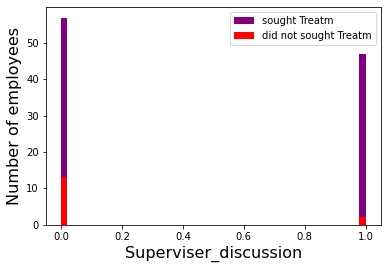

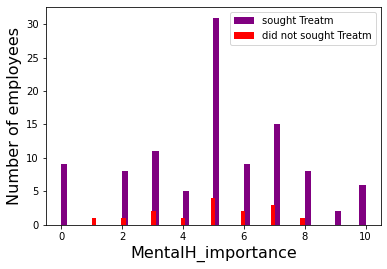

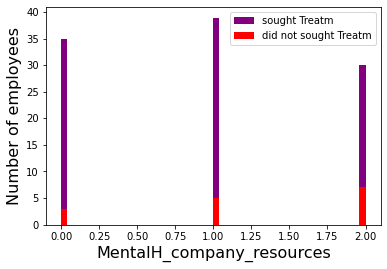

In [27]:
def plotFeatures(data_dframe,f1):
    feat1 = str(f1)
    #separate features vs class
    df_soughtT = data_dframe[data_dframe['Treatment_sought'] == 1]
    df_not_soughtT = data_dframe[data_dframe['Treatment_sought'] == 0]
    #plot features vs class
    fig,ax = plt.subplots()
    bval,bins,patches = plt.hist(df_soughtT[feat1].astype(float),bins = 50,facecolor="purple",label='sought Treatm')
    bval,bins,patches = plt.hist(df_not_soughtT[feat1].astype(float),bins = 50,facecolor="red",label='did not sought Treatm')
    ax.legend()
    plt.xlabel(feat1,fontsize = 16)
    plt.ylabel('Number of employees',fontsize = 16)
    #plt.savefig('plot_'+feat1+'.png')
    
featList = ['Superviser_discussion','MentalH_importance','MentalH_company_resources']
for i in range(len(featList)):
        plotFeatures(df_qA,featList[i])
        #plt.close("all")